### install the `prml` library are from the repository: [https://github.com/ctgk/PRML](https://github.com/ctgk/PRML)

1. Clone the git locally
2. setup.py install

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import det

%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
plt.style.use("seaborn")

# Chapter 1: Introduction

### Polynomial Curve Fitting

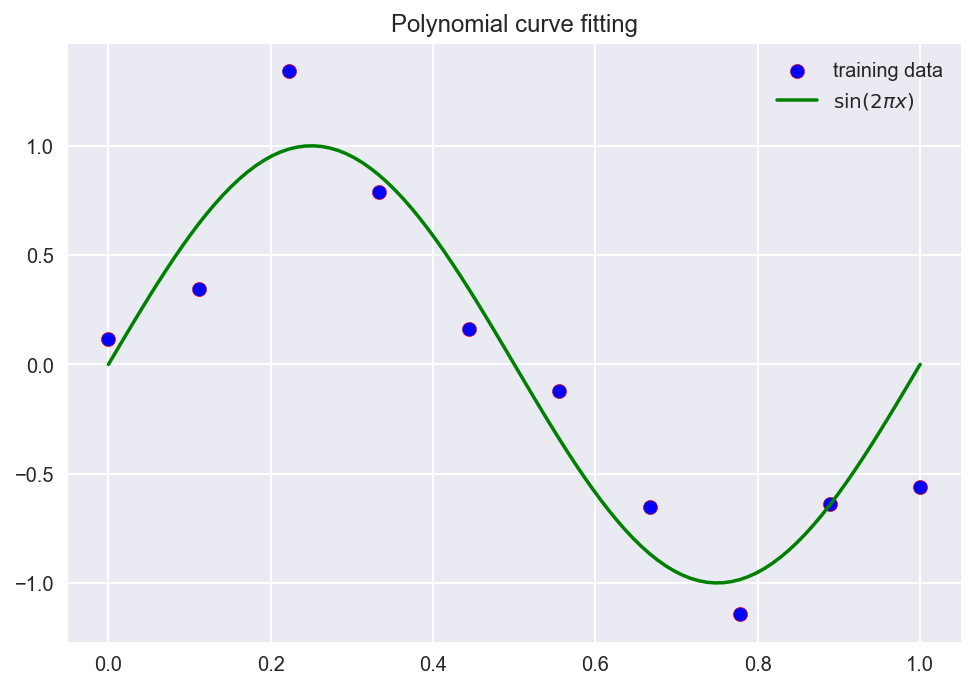

In [4]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="blue", edgecolor="red", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.title("Polynomial curve fitting")
plt.legend()
plt.show()

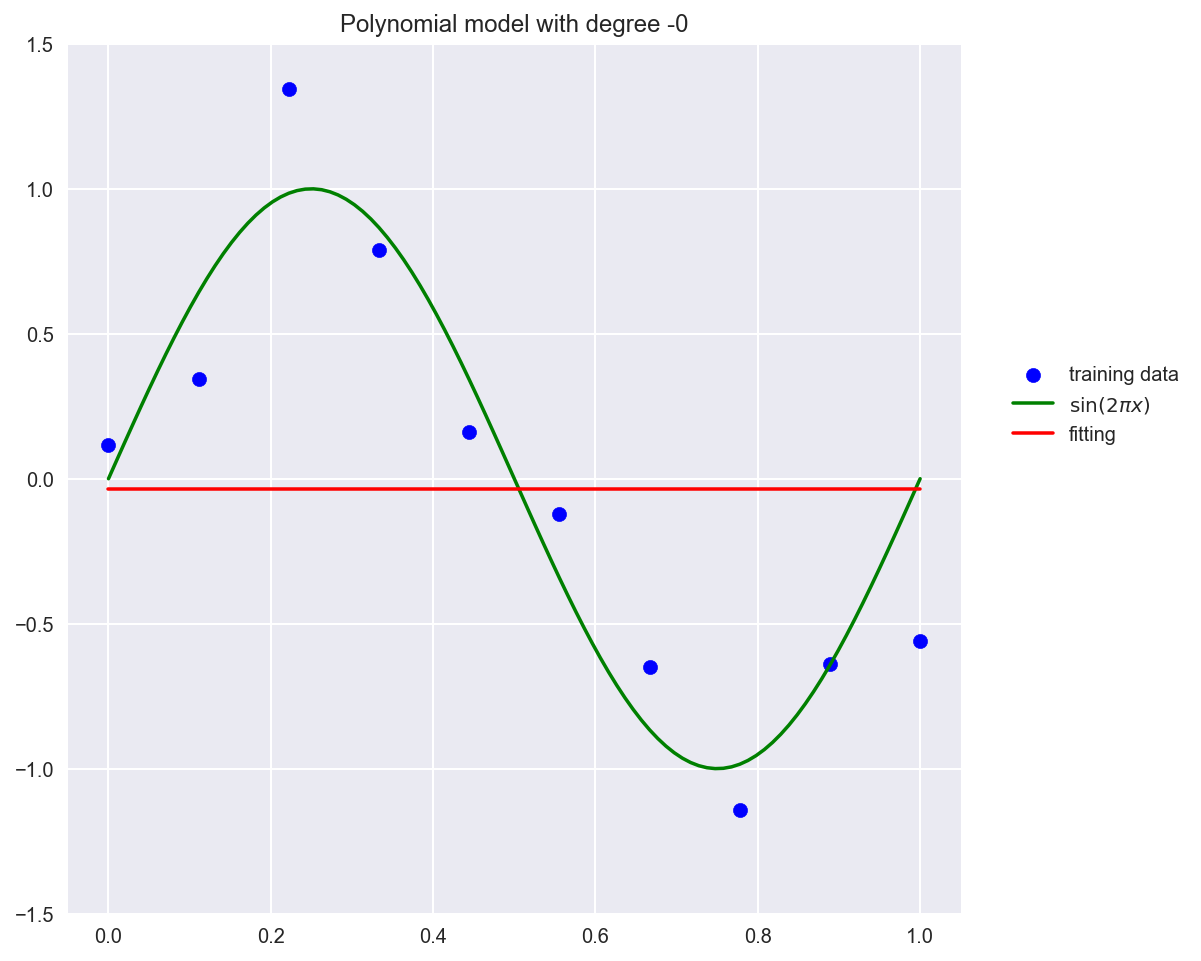

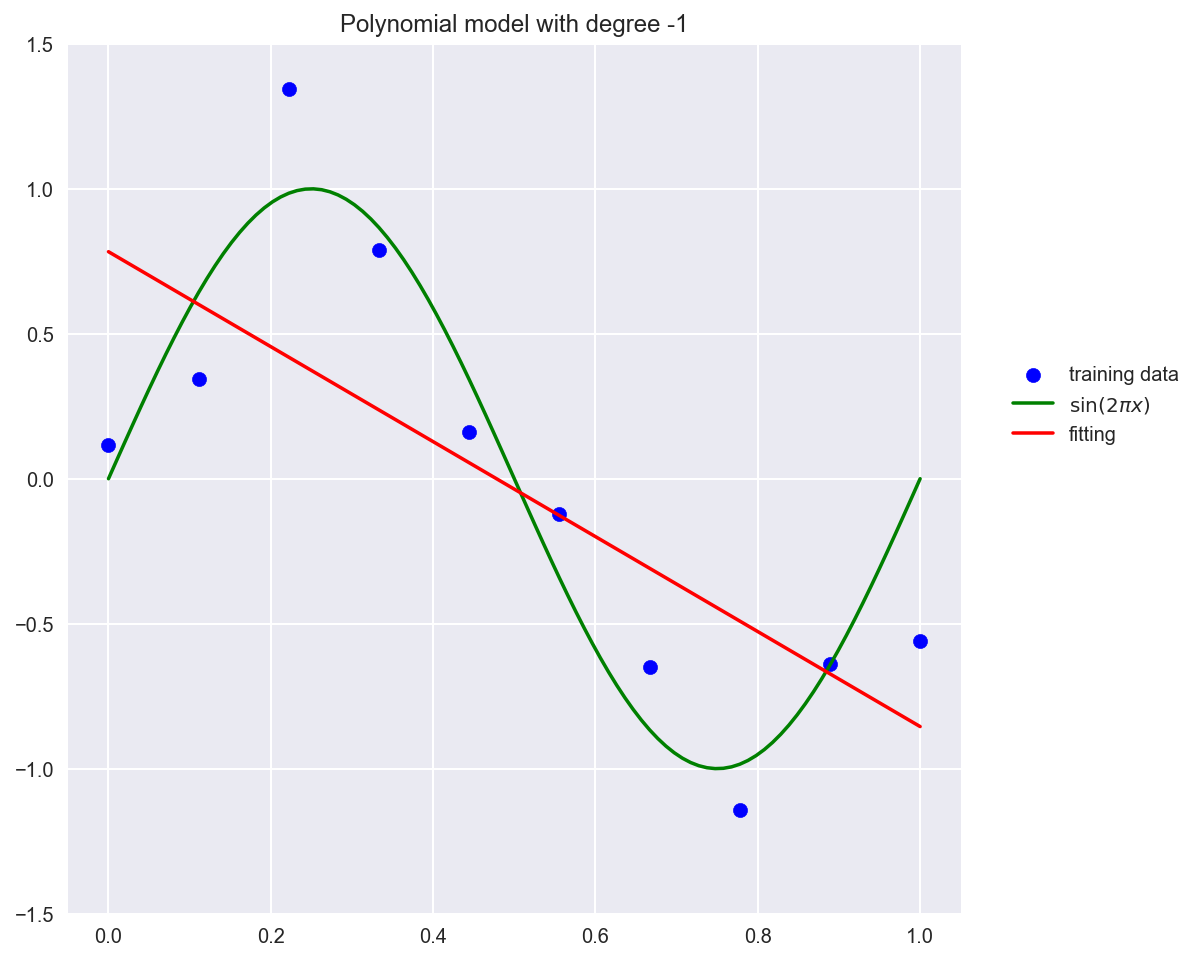

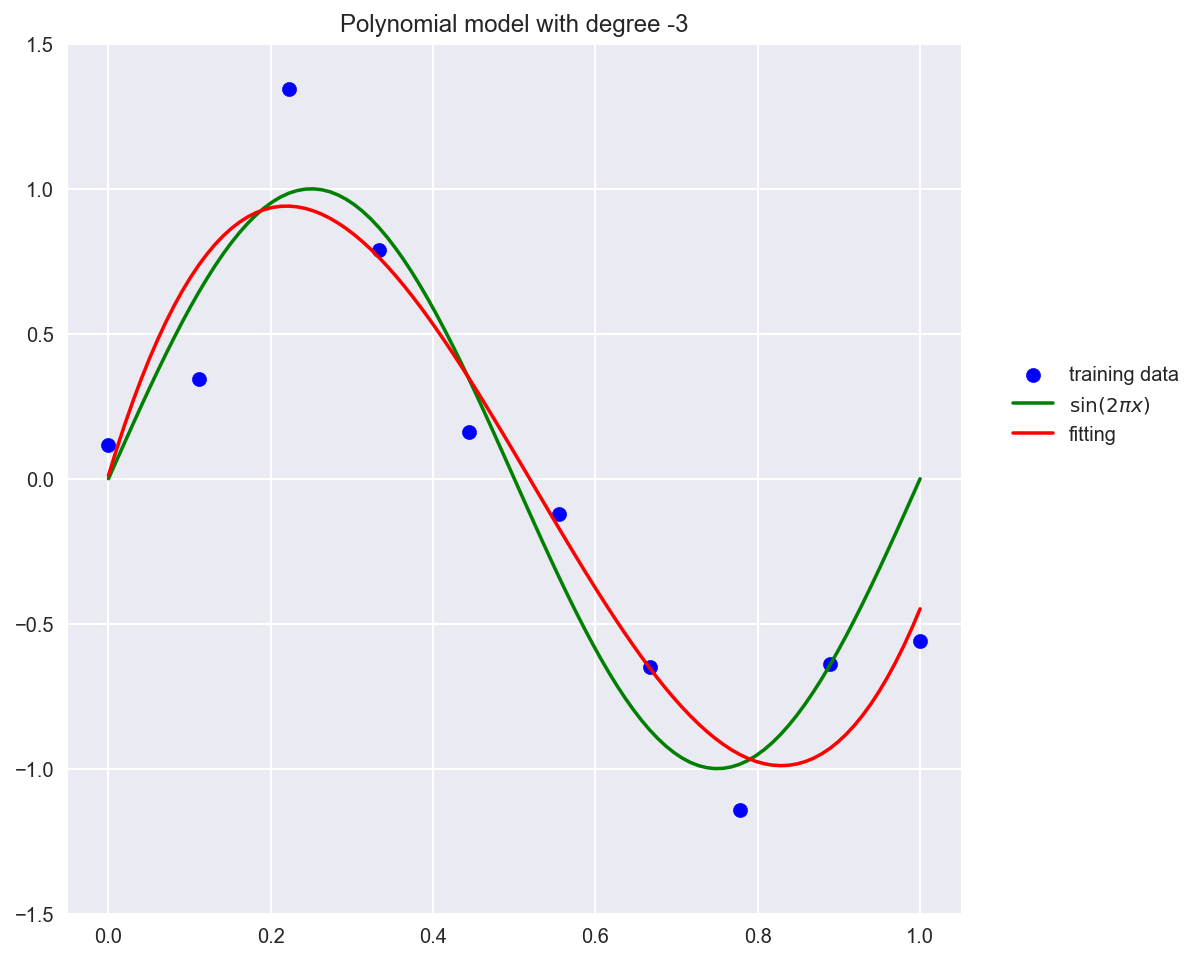

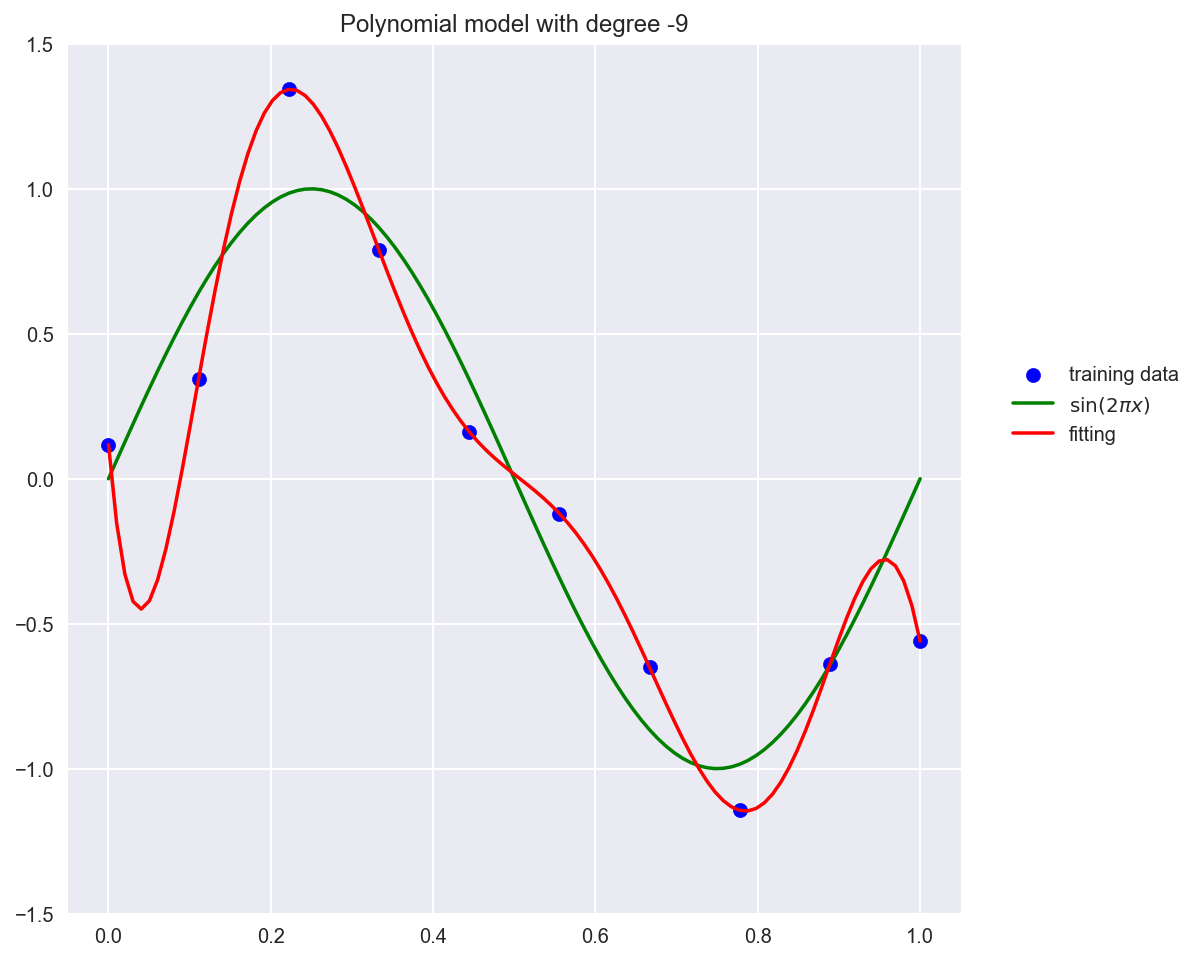

In [5]:
for i, degree in enumerate([0, 1, 3, 9]):
    plt.figure(figsize=(8, 8)) 
    
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.title("Polynomial model with degree -"+str(degree))
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
    plt.show()

### Showing the training/Testing errors - RMSE

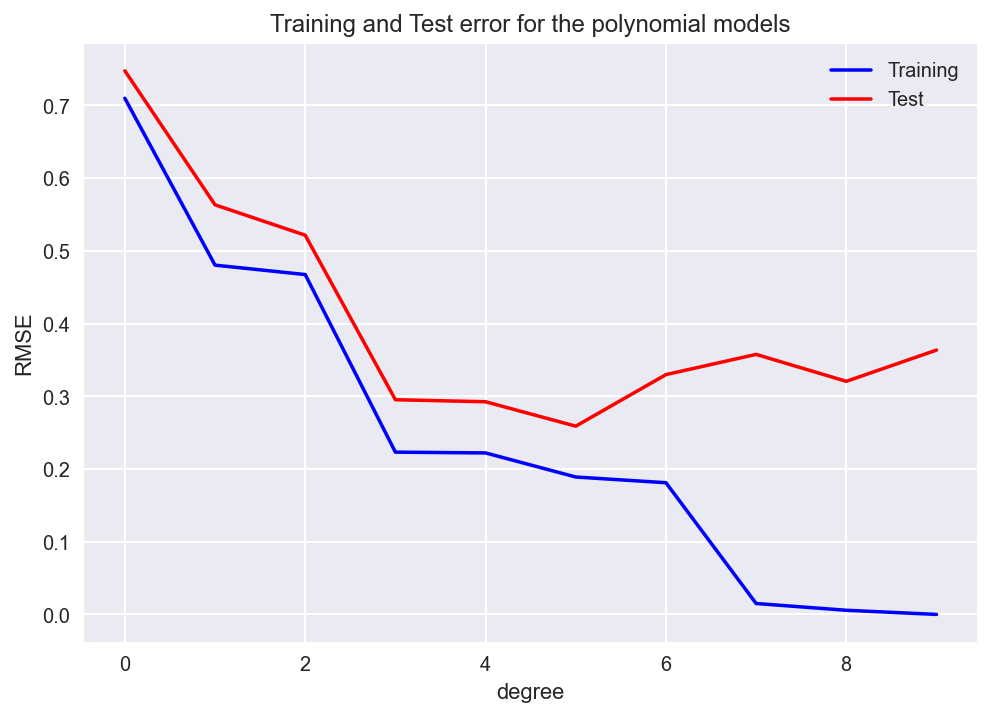

In [6]:
#Get Root mean square error
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.title("Training and Test error for the polynomial models")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### Regularization fitting

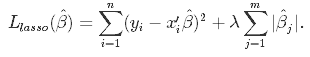

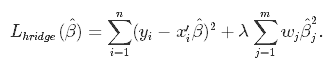

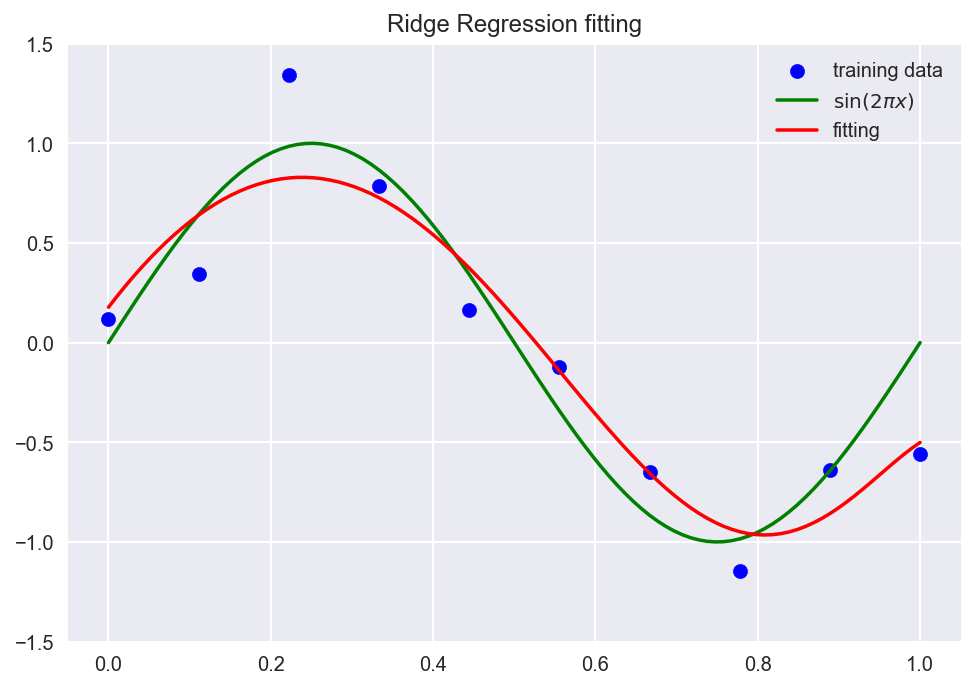

In [7]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.title("Ridge Regression fitting")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.show()

### Bayesian curve fitting

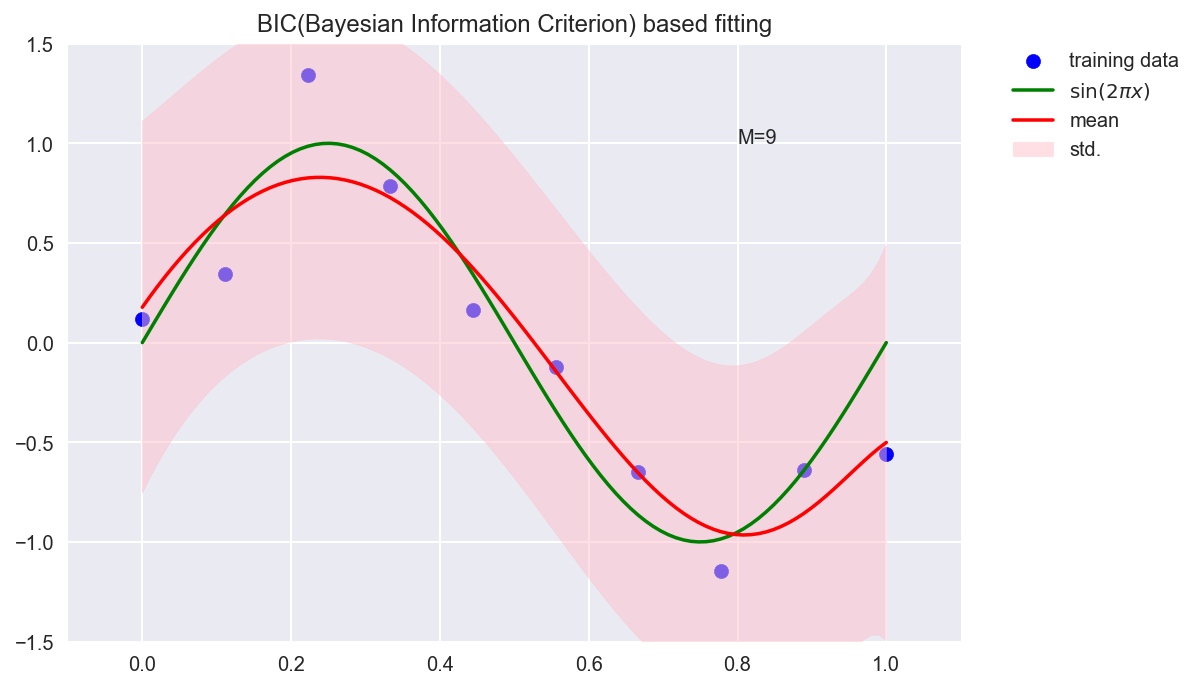

In [8]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="blue", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.title("BIC(Bayesian Information Criterion) based fitting")
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()

## Bayesian Probabilities
Consider a probability distribution driven by a set of parameters $w$ and observed data $D$. Depending on the point of view about $w$  we might consider knowing the *true* value of $w$ considering $D$ in the following two ways:

* **frequentist POV**: $w$ is unique but unknown, we can estimate how close we are to $w$ via $D$
* **bayesian POV**: $D$ is unique (the one observed); $w$ is a random variable (might change, we will see its effect once in $D$)

	In both the frequentist POV and the bayesian POV we make use of MLE $\mathbb{P}(D|w)$ . In ML, the negative log-likelyhood is known as the **error function**

$$
	p(w | D) = \frac{p(D|w)p(w)}{p(D)}
$$

Where,
* $p(w|D)$ is the uncertainty in $w$ after having observed $D$
* $p(w)$ is the prior probability distribution; where we capture our prior  beliefs
* $p(D|w)$ is the likelyhood function. It expresses how probable is the observed data for different values of $w$

### The Gaussian Distribution
The gaussian distribution is defined in the following way:
$$
    \mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

An alternative way to represent a gaussian distribution is by considering a *precision* term denoted by $\beta := 1 / \sigma^2$
$$
    \mathcal{N}(x | \mu, \beta^{-1}) = \frac{\beta^{1/2}}{\sqrt{2\pi\sigma^2}}e^{-\frac{\beta}{2}(x - \mu)^2}
$$

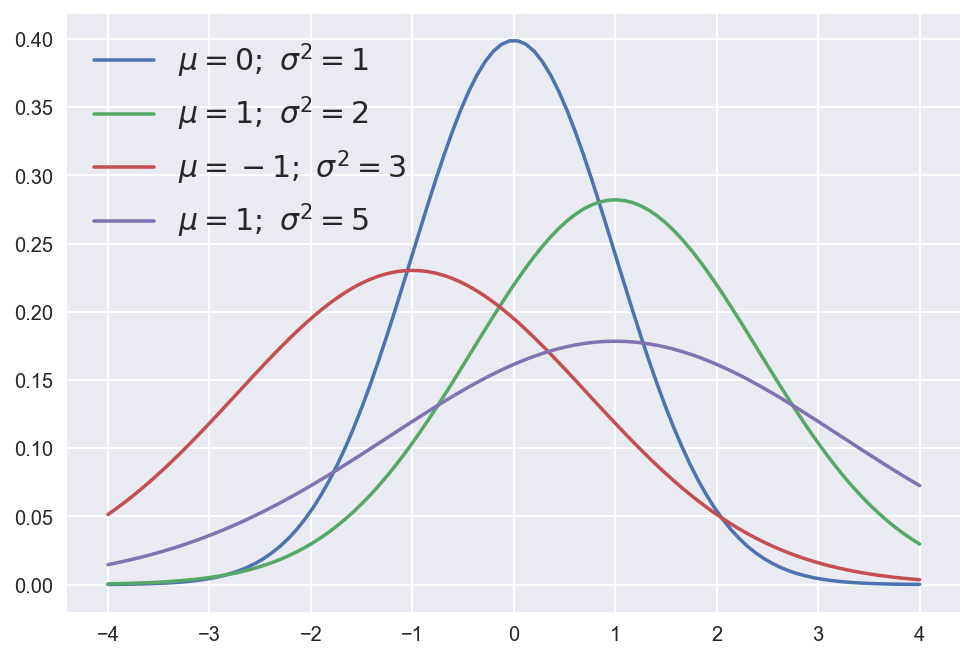

In [9]:
def norm_pdf(x, mu, sigma2): 
    return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-(x - mu)**2 / (2 * sigma2))

xrange = np.linspace(-4, 4, 100)
plt.plot(xrange, norm_pdf(xrange, 0, 1), label=r"$\mu=0; \ \sigma^2=1$")
plt.plot(xrange, norm_pdf(xrange, 1, 2), label=r"$\mu=1; \ \sigma^2=2$")
plt.plot(xrange, norm_pdf(xrange, -1, 3), label=r"$\mu=-1; \ \sigma^2=3$")
plt.plot(xrange, norm_pdf(xrange, 1, 5), label=r"$\mu=1; \ \sigma^2=5$")
plt.legend(fontsize=15)

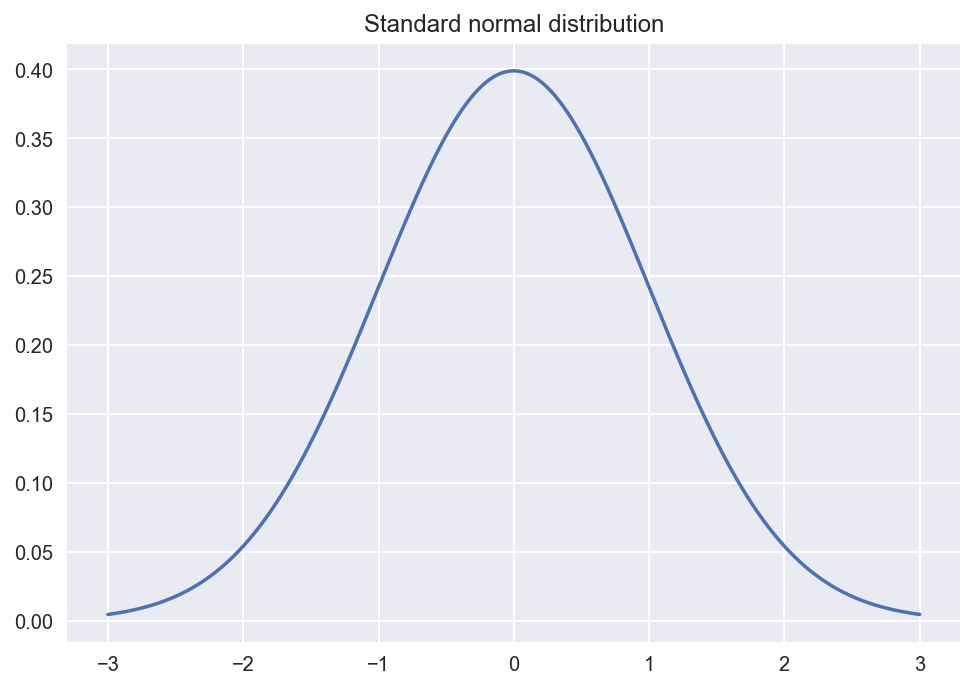

In [27]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma,59)
plt.plot(x, norm_pdf(x, mu, sigma))
plt.title("Standard normal distribution")
plt.show()

### Multivariate normal distribution

The gaussian distribution defined over a $D$ dimensional vector $X$ is

$$
    \mathcal{N}(X | \mu, \Sigma) = \frac{1}{(2\pi)^{D/2}\det(\Sigma)^{1/2}}\exp\left(-\frac{1}{2}(x - \mu)^T\Sigma^{-1}(x - \mu)\right)
$$


In [10]:
from numpy.linalg import inv

In [11]:
Xrange = np.mgrid[-3:3:0.1, -3:3:0.1]

In [12]:
Sigma = np.array([[0.1, -0.8]]).T
Sigma = np.exp(Sigma @ Sigma.T)
mu0 = np.array([[0, 0]]).T

def norm_pdf_v(X, mu, sigma):
    diff_term = (X - mu[:, None])
    D = len(X)
    den = (2 * np.pi) ** (D / 2) * np.sqrt(det(sigma))
    num = np.einsum("inm,ij,jnm->nm", diff_term, inv(sigma), diff_term)
    num = np.exp(-num / 2)
    return num / den

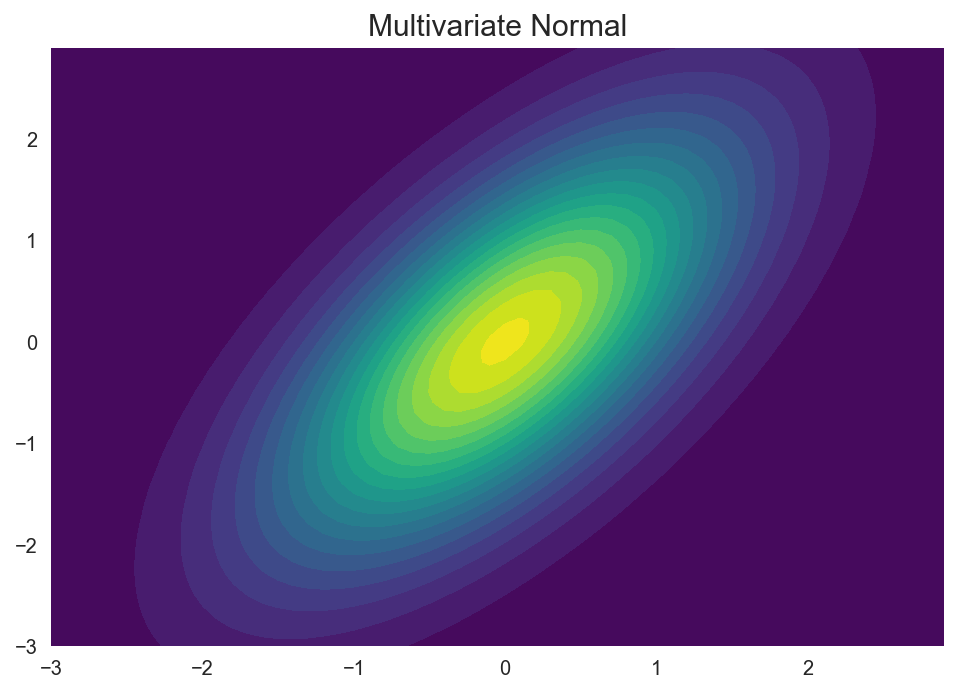

In [13]:
plt.title("Multivariate Normal", fontsize=15)
plt.contourf(*Xrange, norm_pdf_v(Xrange, mu0, Sigma), cmap="viridis", levels=20);

### Entropy

These are two probabilities the first one has a good prediction because also here the class two has the highest probability and the second prediction is a bad prediction here class two get a very low probability and class two get a high probability now then compute cross-entropy.

In [28]:
#Cross Entropy Loss
 
def cross_entropy(y,y_pre):
  loss=-np.sum(y*np.log(y_pre))
  return loss/float(y_pre.shape[0])

y=np.array([0,0,1]) #class #2
 
y_pre_good=np.array([0.1,0.1,0.8])
y_pre_bed=np.array([0.8,0.1,0.1])
 
l1=cross_entropy(y,y_pre_good)
l2=cross_entropy(y,y_pre_bed)
 
print('Loss 1:',round(l1,3))
print('Loss 2:',round(l2,3))

Loss 1: 0.074
Loss 2: 0.768


Here we see that the first prediction has a low loss the second prediction has a high loss.

## Assignment template

In [ ]:
import numpy as np


class normal_distribution():
    def __init__(self):
        """Initialize normal distribution.

        Parameters
        ----------
        param1:
        param2:
        """
       #Definition of the normal distribution

    def plotpdf(self):
        """Plot density function.

        Parameters
        ----------
        param1:
        param2:
        """
        #Plot the pdf